# 1. Discussion and Background of the Business Problem:

Tokyo is one of the most populous metropolitan in the world. Just Tokyo alone has over 15 million people. In addition, there are few hundred thousands people commute from suburb to Tokyo business area to work every day. Tokyo is a one of the most famous gourmet city in the world. Besides traditional Japanese food like sushi, ramen, tempura, other cuisine like Italian, Chinese and French are ranked in top tier globally. There are 226 Michelin-starred restaurants in Tokyo totally, which are the most in the cities around the globe.

Tokyo have 5 major business wards Chiyoda (千代田区), Chuo (中央区), Shinjuku (新宿区), Shibuya (渋谷区) and Shinagawa (品川区). Few hundred thousands of white collar workers consume food, beer, coffee.. etc in these business districts. There are numerous options and competitions are extremely high. If you are a restaurant owner and planning to open a new venue, it may be difficult to decide where to open. Would you choose the most populated area or you choose less competition district. On the other hand, rent is also an important factor in making business decision. In this project, we will examine all these factors and advice business owners where they open a new resturant. 

We will use various tools and methods, for example, geocoder, foursquare , beautiful soap, folium, KMeans clustering, etc to explore and analysis the data.

### Target Audience

F&B business corporation or individual owner can use this analaysis to decide where to expand new outlets that targeting office workers according to their budget.

# 2. Data Preparation

I first make use of a wikipedia page to scrap the table to create a data-frame. For this, I’ve used requests and Beautifulsoup4 library to create a data-frame containing name of the 23 wards with 4 columns wards, district, latitude and longitude. 

In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import xml


In [23]:
#response_obj = requests.get('https://zip.nowmsg.com/city.asp?country=JP&state=Tokyo%20To&county=Shinjuku%20Ku').text
response_obj= requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards').text

In [24]:
soup = BeautifulSoup(response_obj,'html.parser')
table_data = soup.find('table',{'class':'wikitable sortable'})
fields1 = table_data.find_all('td')

In [25]:
new_fields1 = len(fields1) - 9

In [26]:
No = []
Flag = []
Name = []
Kanji = []
Pop = []
Density = []
Size = []
Districts = []

for i in range(0,new_fields1,8):
    No.append(fields1[i].text.strip())
    Flag.append(fields1[i+1].text.strip())
    Name.append(fields1[i+2].text.strip())
    Kanji.append(fields1[i+3].text.strip())
    Pop.append(fields1[i+4].text.strip())
    Density.append(fields1[i+5].text.strip())
    Size.append(fields1[i+6].text.strip())
    Districts.append(fields1[i+7].text.strip())
        
df2 = pd.DataFrame(data=[No,Flag, Name, Kanji, Pop, Density, Size, Districts]).transpose()
df2.columns = ['No', 'Flag', 'Name', 'Kanji', 'Pop','Density','Size','Neighborhood']


In [27]:
df2

,No,Flag,Name,Kanji,Pop,Density,Size,Neighborhood
0,01,,Chiyoda,千代田区,"0059,441","05,100",011.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,,Chūō,中央区,"0147,620","14,460",010.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,,Minato,港区,"0248,071","12,180",020.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,,Shinjuku,新宿区,"0339,211","18,620",018.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,,Bunkyō,文京区,"0223,389","19,790",011.29,"Hongō, Yayoi, Hakusan"
5,06,,Taitō,台東区,"0200,486","19,830",010.11,"Ueno, Asakusa"
6,07,,Sumida,墨田区,"0260,358","18,910",013.77,"Kinshichō, Morishita, Ryōgoku"
7,08,,Kōtō,江東区,"0502,579","12,510",040.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,,Shinagawa,品川区,"0392,492","17,180",022.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,,Meguro,目黒区,"0280,283","19,110",014.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [28]:
#Data Modification Replace Kiba and Kansai due to wrong Lat/long data
dist = pd.DataFrame(df2.Neighborhood.str.split(",",expand=True,))
dist.iloc[7,0] = dist.iloc[7,1]
dist.iloc[22,0] = dist.iloc[22,1]
dist.iloc[21,0] = dist.iloc[21,1]

In [29]:
df2['Neighborhood'] = dist[0]

In [30]:
#Remove some unused columns
df2.drop(['Flag','No','Pop','Density','Size','Kanji'],axis=1,inplace=True)

In [31]:
df2

,Name,Neighborhood
0,Chiyoda,Nagatachō
1,Chūō,Nihonbashi
2,Minato,Odaiba
3,Shinjuku,Shinjuku
4,Bunkyō,Hongō
5,Taitō,Ueno
6,Sumida,Kinshichō
7,Kōtō,Ariake
8,Shinagawa,Shinagawa
9,Meguro,Meguro


In [32]:
#Amend Ward Name data due to spelling discrepancy
df2.iloc[1,0]='Chuo'
df2.iloc[4,0]='Bunkyo'
df2.iloc[5,0]='Taito'
df2.iloc[7,0]='Koto'
df2.iloc[10,0]='Ota'




# 2.2. Getting Coordinates of Major Districts : Geopy Client

Next objective is to get the coordinates of these 23 major districts using geocoder class of Geopy client. Using the code snippet as below —


In [10]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


In [33]:
geolocator = Nominatim(user_agent="Tokyo_explorer")
df2['Location'] = df2['Neighborhood'].apply(geolocator.geocode).apply(lambda x: (x. latitude, x.longitude))

In [34]:
df2[['Latitude','Longitude']] = df2['Location'].apply(pd.Series)

In [35]:
df2.drop(['Location'],axis=1,inplace=True)

In [36]:
df2

,Name,Neighborhood,Latitude,Longitude
0,Chiyoda,Nagatachō,35.675618,139.743469
1,Chuo,Nihonbashi,35.684068,139.774503
2,Minato,Odaiba,35.619050,139.779364
3,Shinjuku,Shinjuku,35.693763,139.703632
4,Bunkyo,Hongō,35.175376,137.013476
5,Taito,Ueno,35.711759,139.777645
6,Sumida,Kinshichō,35.696312,139.815043
7,Koto,Ariake,35.634556,139.793256
8,Shinagawa,Shinagawa,35.599252,139.738910
9,Meguro,Meguro,35.621250,139.688014


# 2.3 Getting Land price to estimate which district has the highest rent

## We retrive average land price JPY/sqm from Utinokati page.
## Assume higher land price equals to higher rent

In [37]:
response_land = requests.get('https://utinokati.com/en/details/land-market-value/area/Tokyo/').text
soup1 = BeautifulSoup(response_land,'html.parser')

In [38]:
table_post = soup1.find('table')
fields = table_post.find_all('td')

In [39]:
Area = []
Avg_TradingPrice = []
Avg_UnitPrice = []
Transactions = []

for i in range(0, len(fields), 4):
    Area.append(fields[i].text.strip())
    Avg_TradingPrice.append(fields[i+1].text.strip())
    Avg_UnitPrice.append(fields[i+2].text.strip())
    Transactions.append(fields[i+3].text.strip())
        
df_land = pd.DataFrame(data=[Area, Avg_TradingPrice, Avg_UnitPrice,Transactions]).transpose()
df_land.columns = ['Area', 'AverageTradingPrice', 'AverageUnitPrice', 'Transactions']


In [40]:
df_land[['UnitPrice','Unit']]=df_land.AverageUnitPrice.str.split(expand=True,)
df_land[['Name','ku']]=df_land.Area.str.split("-",expand=True,)

In [41]:
df_land

,Area,AverageTradingPrice,AverageUnitPrice,Transactions,UnitPrice,Unit,Name,ku
0,Chiyoda-Ku,"349,166,667 JPY","2,602,846 JPY/sq.m",267 件,"2,602,846",JPY/sq.m,Chiyoda,Ku
1,Chuo-Ku,"488,036,585 JPY","2,688,537 JPY/sq.m",407 件,"2,688,537",JPY/sq.m,Chuo,Ku
2,Minato-Ku,"554,439,024 JPY","2,180,846 JPY/sq.m",670 件,"2,180,846",JPY/sq.m,Minato,Ku
3,Shinjuku-Ku,"154,116,688 JPY","940,756 JPY/sq.m","1,451 件","940,756",JPY/sq.m,Shinjuku,Ku
4,Bunkyo-Ku,"101,739,865 JPY","943,847 JPY/sq.m","1,429 件","943,847",JPY/sq.m,Bunkyo,Ku
5,Taito-Ku,"146,438,356 JPY","1,025,887 JPY/sq.m",946 件,"1,025,887",JPY/sq.m,Taito,Ku
6,Sumida-Ku,"88,370,671 JPY","607,461 JPY/sq.m","1,174 件","607,461",JPY/sq.m,Sumida,Ku
7,Koto-Ku,"141,129,814 JPY","637,570 JPY/sq.m","1,316 件","637,570",JPY/sq.m,Koto,Ku
8,Shinagawa-Ku,"89,345,244 JPY","766,540 JPY/sq.m","1,885 件","766,540",JPY/sq.m,Shinagawa,Ku
9,Meguro-Ku,"135,183,424 JPY","863,427 JPY/sq.m","1,790 件","863,427",JPY/sq.m,Meguro,Ku


In [42]:
# Drop uncessary columns
df_land=df_land.drop(columns=['Area','AverageTradingPrice', 'AverageUnitPrice', 'Transactions','Unit','ku'],axis=1)
df_land

,UnitPrice,Name
0,"2,602,846",Chiyoda
1,"2,688,537",Chuo
2,"2,180,846",Minato
3,"940,756",Shinjuku
4,"943,847",Bunkyo
5,"1,025,887",Taito
6,"607,461",Sumida
7,"637,570",Koto
8,"766,540",Shinagawa
9,"863,427",Meguro


In [43]:
#df.join(other.set_index('key'), on='key')
df4 = df2.join(df_land.set_index('Name'), on ='Name')


# 2.4 Use Folium to visualize the 23 wards

In [44]:
#!conda install -c conda-forge folium=0.5.0 --yes
 
!pip install folium
import folium # plotting library


     |████████████████████████████████| 102kB 7.2MB/s ta 0:00:011


In [45]:
latitude = 35.6804
longitude = 139.7690
print('The geograpical coordinate Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate Tokyo are 35.6804, 139.769.


In [91]:
map_ward = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, name, district in zip(df2['Latitude'], df2['Longitude'], df2['Name'], df2['Neighborhood']):
    label = '{}, {}'.format(district, name)
#     print(label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ward)
    
map_ward


## 2.5 Foursquare Data

Let’s make use of Foursquare API and get the top 100 venues that are within a radius of 500 meters in each 23 wards' neighborhood .

Number of venues and their type and location around every neighborhood/district.
   



In [47]:
CLIENT_ID = 'I0G2LDXOOP2SUSCCKITFJFYDEPBGF0A4TXSE10EHLUMK3V23'
CLIENT_SECRET = 'MO4JYDAJVQX3UCMBCUMPQK2P5LSYVE3R24Q22RMTYZZ4ESCU'
VERSION = '20180605' # Foursquare API version

In [48]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius



In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name) 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

tokyo_venues = getNearbyVenues(names=df2['Neighborhood'],
                               latitudes=df2['Latitude'],
                               longitudes=df2['Longitude']
                              )

Nagatachō
Nihonbashi
Odaiba
Shinjuku
Hongō
Ueno
Kinshichō
 Ariake
Shinagawa
Meguro
Ōmori
Setagaya
Shibuya
Nakano
Kōenji
Ikebukuro
Akabane
Arakawa
Itabashi
Nerima
Ayase
 Aoto
 Koiwa


In [50]:
print("There are ", tokyo_venues.shape[0], "resturants in ",len(pd.unique(tokyo_venues['Neighborhood'])),"wards")
print('{} unique categories'.format(tokyo_venues['Venue Category'].value_counts().shape[0]))


There are  1341 resturants in  23 wards
202 unique categories


In [51]:
tokyo_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Nagatachō,35.675618,139.743469,Nagatacho Kurosawa (永田町 黒澤),35.674699,139.741737,Japanese Restaurant
1,Nagatachō,35.675618,139.743469,The Capitol Hotel Tokyu (ザ・キャピトルホテル東急),35.673927,139.741019,Hotel
2,Nagatachō,35.675618,139.743469,Tully's Coffee,35.674594,139.743007,Coffee Shop
3,Nagatachō,35.675618,139.743469,Shinamen Hashigo (支那麺 はしご),35.672184,139.741576,Ramen Restaurant
4,Nagatachō,35.675618,139.743469,All Day Dining Origami (オールデイダイニング ORIGAMI),35.673815,139.741104,Restaurant


In [52]:
print("Top 10 categories are:")
print(tokyo_venues['Venue Category'].value_counts()[0:10])

Top 10 categories are:
Convenience Store      111
Sake Bar                92
Ramen Restaurant        68
Café                    55
Japanese Restaurant     48
Coffee Shop             44
Chinese Restaurant      40
BBQ Joint               36
Italian Restaurant      31
Bar                     27
Name: Venue Category, dtype: int64


In [53]:
tokyo_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1336,Koiwa,35.733236,139.881843,もんじゃ焼・鉄板焼 みつばち,35.729618,139.881379,Monjayaki Restaurant
1337,Koiwa,35.733236,139.881843,たこ田信玄,35.735653,139.885606,Takoyaki Place
1338,Koiwa,35.733236,139.881843,スーパーヤマイチ 東小岩店,35.735483,139.885852,Grocery Store
1339,Koiwa,35.733236,139.881843,Yumean (夢庵 南小岩店),35.729103,139.881543,Japanese Restaurant
1340,Koiwa,35.733236,139.881843,アタック 南小岩6丁目店,35.730408,139.877720,Supermarket


# 3 Exploratory Data Analysis:

## 3.1 Use Bar chart to show Top 10 Categories of Resturants in 23 wards

In [54]:
%matplotlib inline 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
#df_can.sort_values(by='Total', ascending=True, inplace=True)
#df_top15=df_can['Total'].tail(15)
#df_top15

#df2.columns = ['No', 'Flag', 'Name', 'Kanji', 'Pop','Density','Size','Districts']
top10 = tokyo_venues['Venue Category'].value_counts()[0:10]

#Convert to dataframe from Series
df3 = pd.DataFrame(top10)

In [56]:
print(top10)

Convenience Store      111
Sake Bar                92
Ramen Restaurant        68
Café                    55
Japanese Restaurant     48
Coffee Shop             44
Chinese Restaurant      40
BBQ Joint               36
Italian Restaurant      31
Bar                     27
Name: Venue Category, dtype: int64


### Convenience store is ranked No.1. Sake Bar and Ramen shops are ranked 2&3.

In [57]:
tokyo_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Nagatachō,35.675618,139.743469,Nagatacho Kurosawa (永田町 黒澤),35.674699,139.741737,Japanese Restaurant
1,Nagatachō,35.675618,139.743469,The Capitol Hotel Tokyu (ザ・キャピトルホテル東急),35.673927,139.741019,Hotel
2,Nagatachō,35.675618,139.743469,Tully's Coffee,35.674594,139.743007,Coffee Shop
3,Nagatachō,35.675618,139.743469,Shinamen Hashigo (支那麺 はしご),35.672184,139.741576,Ramen Restaurant
4,Nagatachō,35.675618,139.743469,All Day Dining Origami (オールデイダイニング ORIGAMI),35.673815,139.741104,Restaurant


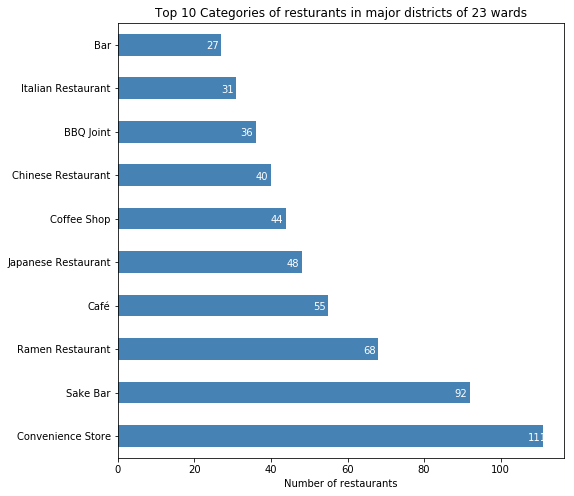

In [94]:
Data=top10
Data.plot(kind='barh', figsize=(8, 8), color='steelblue')
plt.xlabel('Number of restaurants')
plt.title('Top 10 Categories of resturants in major districts of 23 wards')

for index, value in enumerate(Data): 
    label = format(int(value), ',') # format int with comma
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(value - 4, index - 0.1), color='white')

plt.show()


# 3.2 Use pandas groupby on neighborhood column and calculate the mean of the frequency of occurrence of each venue category.

In [59]:
#Use One hot encoding to get more information about venues categories in each district
tokyo_onehot = pd.get_dummies(tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

In [60]:
# add neighborhood column back to dataframe
tokyo_onehot['Neighborhood'] = tokyo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

In [61]:
tokyo_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bangladeshi Restaurant,Bar,Basketball Court,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kaiseki Restaurant,Karaoke Bar,Karaoke Box,Korean Restaurant,Kushikatsu Restaurant,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Mongolian Restaurant,Monjayaki Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Optical Shop,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Pet Café,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Plaza,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Road,Rock Club,Sake Bar,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Soba Restaurant,Soccer Field,Soup Place,South Indian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Tempura Restaurant,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Nagatachō,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Nagatachō,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Nagatachō,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
tokyo_onehot.shape

(1341, 203)

In [63]:
tokyo_grouped = tokyo_onehot.groupby('Neighborhood').mean().reset_index()
tokyo_grouped

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bangladeshi Restaurant,Bar,Basketball Court,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kaiseki Restaurant,Karaoke Bar,Karaoke Box,Korean Restaurant,Kushikatsu Restaurant,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Mongolian Restaurant,Monjayaki Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Optical Shop,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Pet Café,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Plaza,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Road,Rock Club,Sake Bar,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Soba Restaurant,Soccer Field,Soup Place,South Indian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Tempura Restaurant,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Aoto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.00,0.000000,0.000000,0.000000,0.021739,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.021739,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.021739,0.00,0.021739,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.065217,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.043478,0.195652,0.00,0.00,0.000,0.021739,0.000000,0.021739,0.000000,0.000000,0.021739,0.000000,0.021739,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.021739,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.00,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.043478,0.000000,0.043478,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.021739,0.000000,0.00,0.00,0.021739,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.021739,0.000000,0.000000,0.000000,0.065

## 3.3 We try to find out the top 10 categories of restaurants in each Neighborhood

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[3:] 
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tokyo_grouped['Neighborhood']

for ind in np.arange(tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aoto,Convenience Store,Ramen Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Sake Bar,Concert Hall,Noodle House,Bookstore,Steakhouse
1,Ariake,Convenience Store,Bus Stop,Coffee Shop,Italian Restaurant,Plaza,Café,Hotel,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant
2,Koiwa,Convenience Store,Ramen Restaurant,Japanese Restaurant,Discount Store,Coffee Shop,Sake Bar,Grocery Store,Italian Restaurant,Takoyaki Place,Shopping Mall
3,Akabane,Sake Bar,Convenience Store,Ramen Restaurant,Soba Restaurant,BBQ Joint,Coffee Shop,Bar,Restaurant,Shopping Mall,Café
4,Arakawa,Convenience Store,Chinese Restaurant,Grocery Store,Park,Ramen Restaurant,Noodle House,Italian Restaurant,Deli / Bodega,Soba Restaurant,Coffee Shop


In [66]:
# Add land price into the dataset to include cost of investment in the analysis
neighborhoods_venues_sorted=neighborhoods_venues_sorted.join(df4.set_index('Neighborhood'),on='Neighborhood')

In [67]:
#df2.drop(['Location'],axis=1,inplace=True)
neighborhoods_venues_sorted.drop(['Name','Latitude','Longitude'],axis=1,inplace=True)

In [68]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,UnitPrice
0,Aoto,Convenience Store,Ramen Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Sake Bar,Concert Hall,Noodle House,Bookstore,Steakhouse,"324,080"
1,Ariake,Convenience Store,Bus Stop,Coffee Shop,Italian Restaurant,Plaza,Café,Hotel,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant,"637,570"
2,Koiwa,Convenience Store,Ramen Restaurant,Japanese Restaurant,Discount Store,Coffee Shop,Sake Bar,Grocery Store,Italian Restaurant,Takoyaki Place,Shopping Mall,"330,471"
3,Akabane,Sake Bar,Convenience Store,Ramen Restaurant,Soba Restaurant,BBQ Joint,Coffee Shop,Bar,Restaurant,Shopping Mall,Café,"542,465"
4,Arakawa,Convenience Store,Chinese Restaurant,Grocery Store,Park,Ramen Restaurant,Noodle House,Italian Restaurant,Deli / Bodega,Soba Restaurant,Coffee Shop,"472,613"
5,Ayase,Convenience Store,Park,Udon Restaurant,Gym,Donut Shop,Flea Market,Fish Market,Fast Food Restaurant,Fabric Shop,Event Space,"293,693"
6,Hongō,Convenience Store,Café,Japanese Restaurant,Mediterranean Restaurant,Deli / Bodega,Rest Area,Pizza Place,Park,Chinese Restaurant,Bus Stop,"943,847"
7,Ikebukuro,Sake Bar,Café,Sushi Restaurant,Yoshoku Restaurant,Japanese Restaurant,Coffee Shop,Dessert Shop,Ramen Restaurant,Plaza,Steakhouse,"732,511"
8,Itabashi,Convenience Store,Park,Italian Restaurant,Hobby Shop,Rest Area,Plaza,Chinese Restaurant,Bus Stop,Bowling Alley,Grocery Store,"437,376"
9,Kinshichō,Sake Bar,Ramen Restaurant,Coffee Shop,Pub,Chinese Restaurant,BBQ Joint,Hotel,Clothing Store,Thai Restaurant,Japanese Restaurant,"607,461"



## 3.4 We use k-means, a machine learning method to cluster the neighborhood into several clusters.



In [69]:
from sklearn.cluster import KMeans


# set number of clusters
kclusters = 5

tokyo_grouped_clustering = tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]





array([1, 0, 1, 2, 1, 3, 1, 2, 4, 2], dtype=int32)

In [70]:
# add clustering labels
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels',1)####
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [71]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,UnitPrice
0,1,Aoto,Convenience Store,Ramen Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Sake Bar,Concert Hall,Noodle House,Bookstore,Steakhouse,"324,080"
1,0,Ariake,Convenience Store,Bus Stop,Coffee Shop,Italian Restaurant,Plaza,Café,Hotel,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant,"637,570"
2,1,Koiwa,Convenience Store,Ramen Restaurant,Japanese Restaurant,Discount Store,Coffee Shop,Sake Bar,Grocery Store,Italian Restaurant,Takoyaki Place,Shopping Mall,"330,471"
3,2,Akabane,Sake Bar,Convenience Store,Ramen Restaurant,Soba Restaurant,BBQ Joint,Coffee Shop,Bar,Restaurant,Shopping Mall,Café,"542,465"
4,1,Arakawa,Convenience Store,Chinese Restaurant,Grocery Store,Park,Ramen Restaurant,Noodle House,Italian Restaurant,Deli / Bodega,Soba Restaurant,Coffee Shop,"472,613"
5,3,Ayase,Convenience Store,Park,Udon Restaurant,Gym,Donut Shop,Flea Market,Fish Market,Fast Food Restaurant,Fabric Shop,Event Space,"293,693"
6,1,Hongō,Convenience Store,Café,Japanese Restaurant,Mediterranean Restaurant,Deli / Bodega,Rest Area,Pizza Place,Park,Chinese Restaurant,Bus Stop,"943,847"
7,2,Ikebukuro,Sake Bar,Café,Sushi Restaurant,Yoshoku Restaurant,Japanese Restaurant,Coffee Shop,Dessert Shop,Ramen Restaurant,Plaza,Steakhouse,"732,511"
8,4,Itabashi,Convenience Store,Park,Italian Restaurant,Hobby Shop,Rest Area,Plaza,Chinese Restaurant,Bus Stop,Bowling Alley,Grocery Store,"437,376"
9,2,Kinshichō,Sake Bar,Ramen Restaurant,Coffee Shop,Pub,Chinese Restaurant,BBQ Joint,Hotel,Clothing Store,Thai Restaurant,Japanese Restaurant,"607,461"


## Now, create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [72]:
tokyo_merged = df2[['Neighborhood','Latitude','Longitude']]
#tokyo_merged = tokyo_merged.rename(columns={"Districts":"Neighborhood"})


In [73]:
# merge  with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
new_tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

new_tokyo_merged.head(23) # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,UnitPrice
0,Nagatachō,35.675618,139.743469,0,Convenience Store,Coffee Shop,Japanese Restaurant,Hotel,Intersection,Gym,Pizza Place,Ramen Restaurant,Diner,Chinese Restaurant,"2,602,846"
1,Nihonbashi,35.684068,139.774503,2,BBQ Joint,Convenience Store,Department Store,Japanese Restaurant,Italian Restaurant,Bakery,Coffee Shop,Sake Bar,Hotel,Pub,"2,688,537"
2,Odaiba,35.619050,139.779364,0,Japanese Restaurant,Convenience Store,Bus Stop,Coffee Shop,Intersection,Pier,Hot Spring,Bar,Soccer Field,Smoke Shop,"2,180,846"
3,Shinjuku,35.693763,139.703632,2,Bar,Sake Bar,Ramen Restaurant,BBQ Joint,Rock Club,Pub,Movie Theater,Chinese Restaurant,Coffee Shop,Hotel,"940,756"
4,Hongō,35.175376,137.013476,1,Convenience Store,Café,Japanese Restaurant,Mediterranean Restaurant,Deli / Bodega,Rest Area,Pizza Place,Park,Chinese Restaurant,Bus Stop,"943,847"
5,Ueno,35.711759,139.777645,2,Sake Bar,Japanese Restaurant,Convenience Store,Ramen Restaurant,Chinese Restaurant,Yoshoku Restaurant,Soba Restaurant,Pub,Grocery Store,Tonkatsu Restaurant,"1,025,887"
6,Kinshichō,35.696312,139.815043,2,Sake Bar,Ramen Restaurant,Coffee Shop,Pub,Chinese Restaurant,BBQ Joint,Hotel,Clothing Store,Thai Restaurant,Japanese Restaurant,"607,461"
7,Ariake,35.634556,139.793256,0,Convenience Store,Bus Stop,Coffee Shop,Italian Restaurant,Plaza,Café,Hotel,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant,"637,570"
8,Shinagawa,35.599252,139.738910,4,Convenience Store,BBQ Joint,Bus Stop,Canal,Grocery Store,Donburi Restaurant,Park,Soba Restaurant,Train Station,Toll Booth,"766,540"
9,Meguro,35.621250,139.688014,0,Japanese Restaurant,Convenience Store,Chinese Restaurant,Grocery Store,Bus Stop,Italian Restaurant,Sushi Restaurant,Men's Store,Noodle House,Park,"863,427"


## 3.5 Visualize the clusters distribution


In [74]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [96]:
# create map
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x1 = np.arange(kclusters)
ys1 = [i+x1+(i*x1)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_tokyo_merged['Latitude'], new_tokyo_merged['Longitude'], new_tokyo_merged['Neighborhood'], new_tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.4).add_to(map_clusters1)
       
map_clusters1

# Discussion

Cluster 0 and 3 contain majority of neighborhoods. There are two clusters group 1 and group 2 contains only one district.

In [76]:
df5 = new_tokyo_merged.groupby('Cluster Labels')['Neighborhood'].size()

In [77]:
print(df5)

Cluster Labels
0    4
1    6
2    9
3    1
4    3
Name: Neighborhood, dtype: int64


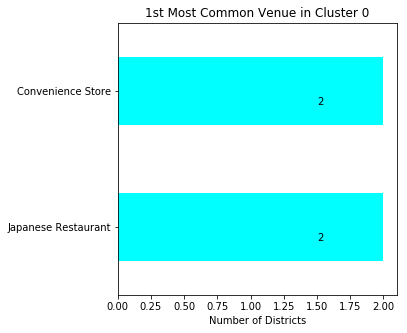

In [81]:
cluster0 = new_tokyo_merged[new_tokyo_merged['Cluster Labels']==0]
data0=cluster0['1st Most Common Venue'].value_counts()


data0.plot(kind='barh', figsize=(5,5), color='cyan')
plt.xlabel('Number of Districts')
plt.title('1st Most Common Venue in Cluster 0')

for index, value in enumerate(data0): 
    label = format(int(value), ',') # format int with comma
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(value-0.5, index - 0.1), color='black')

plt.show()

In cluster 0, two districts found Japanese as the most found commone venues.

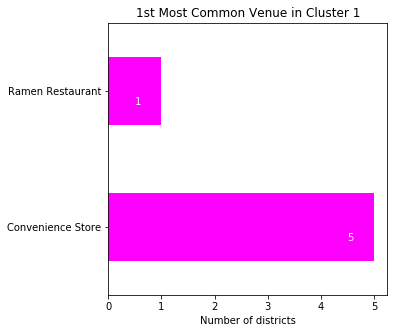

In [83]:
cluster1 = new_tokyo_merged[new_tokyo_merged['Cluster Labels']==1]
data1=cluster1['1st Most Common Venue'].value_counts()


data1.plot(kind='barh', figsize=(5,5), color='magenta')
plt.xlabel('Number of districts')
plt.title('1st Most Common Venue in Cluster 1')

for index, value in enumerate(data1): 
    label = format(int(value), ',') # format int with comma
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(value-0.5, index - 0.1), color='white')

plt.show()

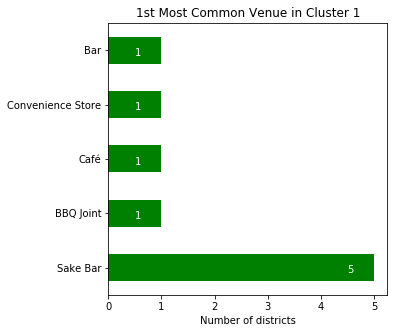

In [85]:
cluster2 = new_tokyo_merged[new_tokyo_merged['Cluster Labels']==2]
data2=cluster2['1st Most Common Venue'].value_counts()


data2.plot(kind='barh', figsize=(5,5), color='green')
plt.xlabel('Number of districts')
plt.title('1st Most Common Venue in Cluster 1')

for index, value in enumerate(data2): 
    label = format(int(value), ',') # format int with comma
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(value-0.5, index - 0.1), color='white')

plt.show()

Pretty clear, Sake Bar is the most popular category in cluster 5.

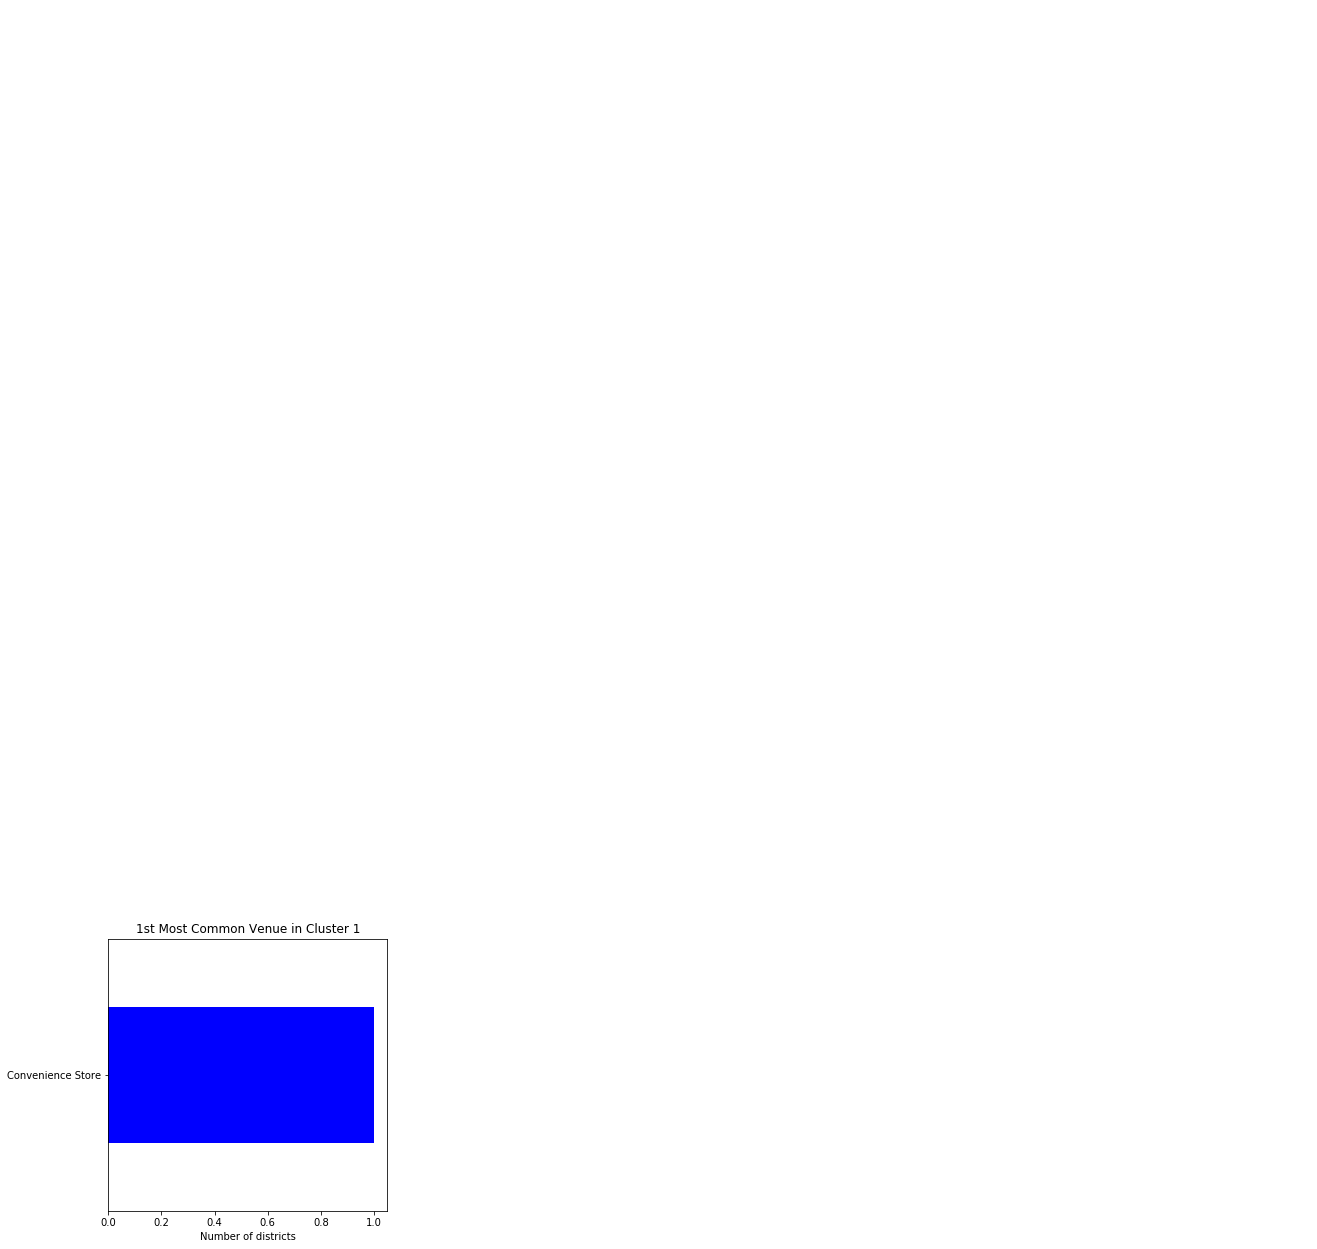

In [88]:
cluster3 = new_tokyo_merged[new_tokyo_merged['Cluster Labels']==3]
data3=cluster3['1st Most Common Venue'].value_counts()


data3.plot(kind='barh', figsize=(5,5), color='blue')
plt.xlabel('Number of districts')
plt.title('1st Most Common Venue in Cluster 1')

for index, value in enumerate(data2): 
    label = format(int(value), ',') # format int with comma
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(value-0.5, index - 0.1), color='white')

plt.show()

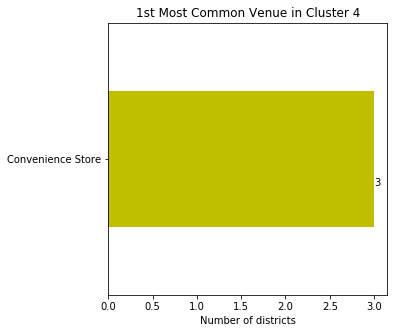

In [87]:
cluster4 = new_tokyo_merged[new_tokyo_merged['Cluster Labels']==4]
data4=cluster4['1st Most Common Venue'].value_counts()


data4.plot(kind='barh', figsize=(5,5), color='y')
plt.xlabel('Number of districts')
plt.title('1st Most Common Venue in Cluster 4')

for index, value in enumerate(data4): 
    label = format(int(value), ',') # format int with comma
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(value, index - 0.1), color='black')

plt.show()

In [89]:
data1_2=cluster1['2nd Most Common Venue'].value_counts()
data4_2=cluster4['2nd Most Common Venue'].value_counts()

print("2nd Most Common Venue in cluster 2\n",data1_2)
print("2nd Most Common Venue in cluster 4\n",data4_2)

2nd Most Common Venue in cluster 2
 Ramen Restaurant      2
Café                  2
Chinese Restaurant    1
Convenience Store     1
Name: 2nd Most Common Venue, dtype: int64
2nd Most Common Venue in cluster 4
 Café         1
Park         1
BBQ Joint    1
Name: 2nd Most Common Venue, dtype: int64


There are 7 districts find convenience stores as the most found venues in cluster 3.

In this exercise, we find that convenience stores is the most popular commerical venus catgory in 23 wards followed by Sake bar and ramen shops. Over half of the districts 
have convenience stores ranked as the top venue catgory. It is not a surprise because convenience store is not only a venue to buy food or drinks but also providing bill payment, cash
dispenser facilities. The total numbers of cafe and coffee shops are roughly the same as the numbers of convenience stores. In terms of foreign cuisine, we find that there are more Chinese restaurants than Korean bbq and
Italian cuisines. Frence cuisine is not ranked in top 10. 

Using K means for segmentation, 23 neigborhoods are grouped into 5 clusters. The largest cluster group 2 contain 9 districts. Five of them have Sake bar ranked as the 
most common venues followed. If you would like to open sake bar type restaurant, you can consider open in these area such as Shinjuku, Nihonbashi, Shibuya because there 
are already many of them in which there is synergy.Both Cluster 1 and 4 have convenience stores as their most ranked venues. Both of them contain 9 districts in total.
Convenience store business owners can try to avoid opening new store in these 9 districts where competition is already severe. 

Nagatacho and Odaiba are belonged to the same cluster 0. Their land price is at the top level in Tokyo over 2mm yen/sqm, 7 times higher than the lowest one on the list. 
We consider both districts have similiar distribution of commercial venus type. A business owner may consider to search for business opportunity in both district 
at the same time.

# 5 Conclusion

In this project, we use geocoder to retrieve location data then we use foursquare to discover commercial venues category 500 meters radius within the designated district in 23 wards.  For easy understanding purpose, we only include one major district in each ward.  To explore the data analysis further, we utilise panda one hot encoding to calculate the mean of the frequency of occurrence of each venue category. By using clustering (K means) method, districts are categorised into 5 groups to show their similarity.  We present the result in a leaflet map using Folium library. Same colour dots are belonged to the same cluster.

To improve the results precisely , we could further include more districts into each ward. For example, Shibuya ward has Shibuya, Ebisu and Daikanyama. We make an assumption that higher land price generates higher rent. It would be more accurate to use actual commercial rental figure rather than average land price because deviation of land price is quite high across different area despite in the same ward.

Similarly, this type of data can be used to solve similar problem in other metropolitan cities. However, assumptions may need to be adjusted in order to achieve the best result.